<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-训练并可视化决策树" data-toc-modified-id="1.-训练并可视化决策树-1">1. 训练并可视化决策树</a></span></li><li><span><a href="#2.-利用决策树做预测" data-toc-modified-id="2.-利用决策树做预测-2">2. 利用决策树做预测</a></span></li><li><span><a href="#3.-估算类的概率（Estimate--Class-Probabilities）" data-toc-modified-id="3.-估算类的概率（Estimate--Class-Probabilities）-3">3. 估算类的概率（Estimate  Class Probabilities）</a></span></li></ul></div>

- DTs 既适用于【分类】，也适用于【回归】任务。

- DTs 是 powerful 的算法，能够 fit 复杂的数据集。

- DTs 是随机森林（Random Forests）的基本组成（fundamental components）。


这里的主要内容：

- 讨论如何训练、可视化以及如何用 DTs 进行预测；

- 介绍 Scikit-Learn 使用的 CART 算法

- 讨论如何 regularize trees 并将他们用于回归任务

- 讨论 DTs 的一些限制（limitations）

In [1]:
# Common imports
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import sklearn


%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

np.random.seed(42)
# Display all the estimator's all parameters when print estimator
# True: only display the non-default values
sklearn.set_config(print_changed_only=False)
# warnings.filterwarnings(action='ignore', message="^internal gelsd")

print('Version of Python:', sys.version)
print('Version of pandas:', pd.__version__)
print('Version of Scikit-Learn:', sklearn.__version__)

Version of Python: 3.6.10 |Anaconda, Inc.| (default, May  8 2020, 02:54:21) 
[GCC 7.3.0]
Version of pandas: 1.1.5
Version of Scikit-Learn: 0.24.1


# 1. 训练并可视化决策树

In [2]:
from sklearn.datasets import load_iris


iris = load_iris()
X = iris['data'][:, 2:]  # 花瓣长度和宽度
y = iris['target']

X.shape, y.shape

((150, 2), (150,))

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# 训练决策树
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=42,
                       splitter='best')

<div class ="alert alert-block alert-info">
    <b>决策树一个优点是，仅需要非常少的数据准备（data preparation），根本不需要 feature scaling 和 feature centering。</b>
</div>

**<font color='crimson'>树的可视化方法1</font>**——使用 **`sklearn.tree.plot_tree`**。这个可视化会自动适应（fit）axis 的大小。使用 `plt.figure` 的 `figsize` 或 `dpi` 参数来控制 rendering 的大小。

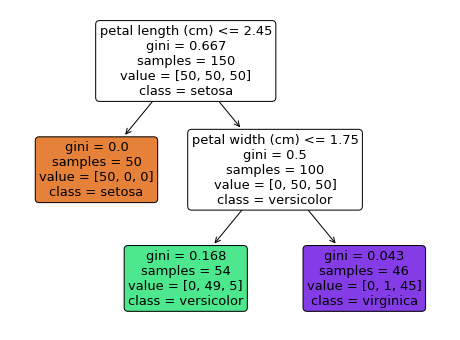

In [5]:
from sklearn.tree import plot_tree


plt.figure(figsize=(8, 6))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    # 给叶子节点加上颜色，用来区分
    filled=True,
    # 圆角框框，并使用 Helvetica 字体
    # 否则（False），是直角框框，并且是 Times-Roman 字体
    rounded=True
)
plt.show()

**<font color='crimson'>树的可视化方法2</font>**——使用 `sklearn.tree.export_graphviz` 将树 export 成 [Graphviz](https://www.graphviz.org/) 格式

In [9]:
import graphviz
from sklearn.tree import export_graphviz

In [10]:
# 结果存在 PDF 文件中
dot_data = export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

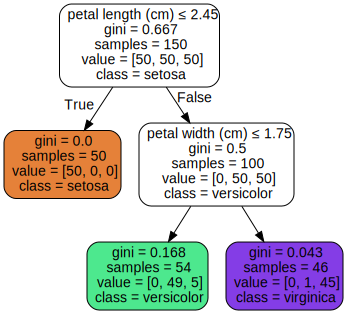

In [14]:
# 也可以弄得美观一点
dot_data = export_graphviz(tree_clf, out_file=None, 
                     feature_names=iris.feature_names[2:],  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

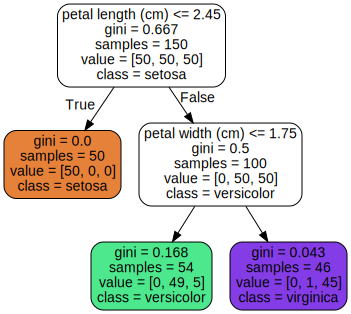

In [16]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graphviz.Source.from_file("iris_tree.dot")

**<font color='crimson'>树的可视化方法3</font>**——使用 `sklearn.tree.export_text` 将导出成文本格式（export_text）。

In [23]:
from sklearn.tree import export_text


# Text summary of all the rules in the decision tree
report = export_text(tree_clf, feature_names=iris.feature_names[2:])
print(report)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



# 2. 利用决策树做预测

**<font color='blue'>过程：</font>**

从**根节点（root node）**（depth=0，在顶部）开始——判断「花瓣长度」（petal length）是否 <= 2.45 厘米。

- 如果是，会走到根节点的左子节点（depth=1，左侧），这是一个**叶子节点（leaf node）**（不含任何子节点），所以只需要查看该叶子节点预测的类别，预测结果是 *Iris setosa*。


- 如果「花瓣长度」 > 2.45 厘米的话，会走到根节点的右子节点（depth=1，右侧），该节点不是叶子节点，所以需要判断「花瓣宽度」是否 <= 1.75 厘米。

  - 如果是，走到子节点（depth=2，左侧），这是一个叶子节点，会做预测，预测结果为 *Iris versicolor*。
  
  - 如果「花瓣宽度」 > 1.75 厘米，会走到右子节点（depth=2，右侧），这也是一个叶子节点，预测结果为 *Iris virginica*。
  
**<font color='blue'>节点中的属性：</font>**

- **samples**：表示适用于该节点的训练样本数量。比如，有 100 个训练样本的「花瓣长度」 >2.45 厘米，其中 54 个训练样本的「花瓣宽度」 <= 1.75 厘米。


- **values**：表示适用于该节点中的每个类别对应的训练样本数量。比如，最左下的叶子节点（紫色）中，类别为 *Iris setosa* 的训练样本有 0 个，类别为 *Iris versicolor* 的训练样本有 1 个，类别为 *Iris virginica* 的训练样本有 45 个。


- **gini**：表示该节点的纯度（impurity）。当该节点中所有样本都属于同一个类别时，那么该节点是一个 “pure” （gini=0）节点。比如，上图的中黄色节点，该节点中的 50 个训练样本都属于 *Iris setosa* 这个类别，所以 gini=0。


**<font color='red'>Gini impurity:</font>**

$$G=1-\sum^n_{k=1}p_k^2$$

其中，$p_k$ 表示该节点中各类别（k）的占比。

如，绿色节点中

In [25]:
gini = 1 - (0/54)**2 - (49/54)**2 - (5/54)**2
gini

0.1680384087791495

<div class ="alert alert-block alert-info">
<b>Scikit-Learn 使用的是 CART 算法，只会生成二叉树（binary trees）——非叶子节点总是有 2 个孩子（子节点）（即，总是做“是/否”的判断）。其他算法（ID3 和 C4.5）生成的决策树中的节点可以有 2 个以上的子节点。</b>
</div>

In [26]:
from matplotlib.colors import ListedColormap

In [34]:
# 决策树的 decision boundaries
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 1000),
        np.linspace(y_min, y_max, 1000))

    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new).reshape(xx.shape)
    
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(xx, yy, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label=iris.target_names[0])
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label=iris.target_names[1])    
    plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], 'g^', label=iris.target_names[2])    
    
    plt.xlabel('Petal length (cm)', fontsize=14)
    plt.ylabel('Petal width (cm)', fontsize=14)
    plt.legend(fontsize=16)

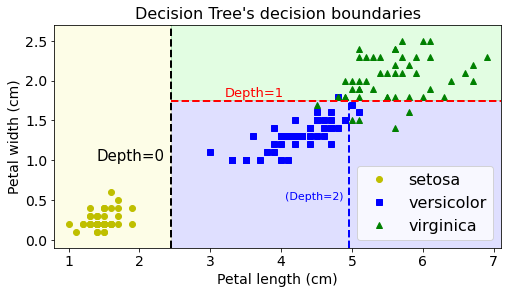

In [38]:
plt.figure(figsize=(8, 4.1))
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree's decision boundaries", fontsize=16)

plt.plot([2.45, 2.45], [X[:, 1].min()-0.2, X[:, 1].max()+0.2], 'k--', linewidth=2)
plt.plot([2.45, X[:, 0].max()+0.2], [1.75, 1.75], 'r--', linewidth=2)
plt.plot([4.95, 4.95], [X[:, 1].min()-0.2, 1.75], c='b', ls='--', lw=2)
plt.text(1.40, 1.0, 'Depth=0', color='k', fontsize=15)
plt.text(3.2, 1.80, 'Depth=1', color='r', fontsize=13)
plt.text(4.05, 0.5, '(Depth=2)', color='b', fontsize=11)

plt.show()

上图中，TODO，抄书。

<div class="alert alert-block alert-danger">
    <center><b>模型解释性（Model interpretation）——黑盒 vs 白盒</b></center>
    <br>
    决策树是直观的（intuitive），所做的决策很容易解释。这种模型称之为<b>白盒模型（white box models）</b>，而随机森林和神经网络通常被认为是<b>黑盒模型（black box models）</b>。黑盒模型的预测准确度很好，可以很容易 check 做出决策的计算，但是，通常很难用简单的术语解释为什么做出这些决策。
</div>

# 3. 估算类的概率（Estimate  Class Probabilities）